## **Preprocessing on Titanic Dataset**

Source: ToT Microcredential AI-Data Science Director General of Higher Education, with several changes

### Import Library dan Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [ ]:
titanic1 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/data_titanic1.csv')

In [ ]:
# Print data dimensions
print("data: ", titanic1.shape)

data:  (900, 14)


In [ ]:
# Read the columns in the DataFrame
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     900 non-null    int64  
 1   survived   900 non-null    int64  
 2   name       900 non-null    object 
 3   sex        900 non-null    object 
 4   age        804 non-null    float64
 5   sibsp      900 non-null    int64  
 6   parch      900 non-null    int64  
 7   ticket     900 non-null    object 
 8   fare       900 non-null    float64
 9   cabin      281 non-null    object 
 10  embarked   898 non-null    object 
 11  boat       389 non-null    object 
 12  body       90 non-null     float64
 13  home.dest  742 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 98.6+ KB


### **Variable Descriptions:**

`pclass`:          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

`survival`:        Survival
                (0 = No; 1 = Yes)

`name`:           Name

`sex`:             Sex

`age`:             Age

`sibsp`:           Number of Siblings/Spouses Aboard

`parch`:           Number of Parents/Children Aboard

`ticket`:          Ticket Number

`fare`:            Passenger Fare

`cabin`:           Cabin

`embarked`:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

`boat`:            Lifeboat

`body`:            Body Identification Number

`home.dest`:       Home/Destination

**SPECIAL NOTES:**

`pclass` is a proxy for socio-economic status (SES)

 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

`pclass` mengacu pada kelas penumpang (1, 2, 3) yang merepresentasikan kelas sosial ekonomi.

In [ ]:
titanic1.head()

### Basic Summary Statistic

In [ ]:
titanic1.describe()

With the "describe" method we get basic statistics for numeric attributes.

What can be observed?
In the "fare" attribute, the standard deviation appears high, far above the mean, it is necessary to look further at the data distribution.

In [ ]:
# Displays a summary of non numerical attributes
display(titanic1.describe(include=np.object))

,name,sex,ticket,cabin,embarked,boat,home.dest
count,900,900,900,281,898,389,742
unique,899,2,617,178,3,25,366
top,"Connolly, Miss. Kate",male,CA 2144,C23 C25 C27,S,4,"New York, NY"
freq,2,560,8,6,637,31,64


In the table above, "unique" indicates how many variations there are in the values in an attribute.
If "unique" is 1, the attribute can be removed, because its value is the same for all rows.

In [ ]:
# Plot several columns to see their frequency distribution
def countplot(column):
    return sns.countplot(x= column, data= titanic1)

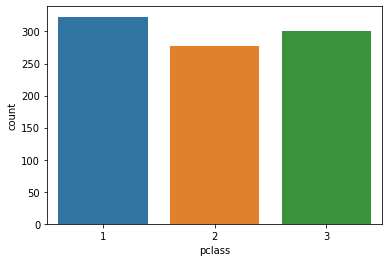

In [ ]:
countplot('pclass')

Based on the plot above, it can be seen that the highest frequency is class 1 (upper social economic status).

In [ ]:
countplot('survived')

Based on the plot above, it can be seen that fewer passengers survived.

In [ ]:
countplot('embarked')

Based on the plot above, it can be seen that Southampton has the most embarkations.

In [ ]:
countplot('sex')

Based on the plot above, it can be seen that there are fewer female passengers than male passengers.

In [ ]:
# Get the correlation value (Person coefficient) of a numeric attribute, with the "corr" method
titanic1.corr(method='pearson')

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.300993,-0.407413,0.048759,0.041097,-0.523887,-0.060393
survived,-0.300993,1.000000,-0.080387,0.050267,0.139735,0.251140,NaN
age,-0.407413,-0.080387,1.000000,-0.192277,-0.157046,0.164158,0.000347
sibsp,0.048759,0.050267,-0.192277,1.000000,0.403285,0.155961,0.077668
parch,0.041097,0.139735,-0.157046,0.403285,1.000000,0.222607,-0.031701
fare,-0.523887,0.251140,0.164158,0.155961,0.222607,1.000000,-0.040643
body,-0.060393,NaN,0.000347,0.077668,-0.031701,-0.040643,1.000000


In [ ]:
# Get the correlation value of a nonnumeric attribute, with the "chi2" method
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

Chi-square can be used to see the influence or correlation of two categorical and measuring variables
the strength of the relationship between one variable and another
other categorical variables. In a more general sense, chi-square is useful for seeing whether the distributions of categorical variables differ from each other.

In [ ]:
# Correlation between survived and pclass
compute_freq_chi2(titanic1.survived,titanic1.pclass)

Frequency table
pclass      1    2    3
survived               
0         123  158  222
1         200  119   78
ChiSquare test statistic:  81.61469423204498
p-value:  1.894935039255057e-18


More than 200 class 3 passengers did not survive.

In [ ]:
# Correlation between survived and embarked
compute_freq_chi2(titanic1.survived,titanic1.embarked)

Most of the S's embarkations were not survived

# Data Preprocessing

*Data Preparation* or *data preprocessing* is a process of cleaning and transforming *raw data* before it is processed and analyzed. In some prediction algorithms, special *preprocessing* is needed so that the algorithm can run well.

**DISCLAIMER!** In this example, *preprocessing* is
carried out is intended for algorithms that have the following characteristics:
* sensitive to outliers
* the features need to have an equivalent range

### **Redundancy/duplicates**

In [ ]:
# Import data_titanic2
titanic2 = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/data_titanic2.csv')

In [ ]:
# Menggabungkan dua data frame
frames = [titanic1, titanic2]
merged_titanic = pd.concat(frames).reset_index(drop=True)

In [ ]:
merged_titanic.shape

(1359, 14)

(a) Checking redudancy

In [ ]:
merged_titanic.duplicated(keep=False).sum()

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1359,1359,1359,335,1357,520,788
unique,1307,2,929,186,3,27,369
top,"Butt, Major. Archibald Willingham",male,CA. 2343,C22 C26,S,13,"New York, NY"
freq,2,869,11,8,942,39,72


Yes there is redundancy/duplication == 100 rows / Redundancy == 50.

(b) What can you do to deal with such data redundancies?

In [ ]:
# dropping duplicate values
merged_titanic = merged_titanic.drop_duplicates()

50

Using drop duplicate to delete duplicate values

Redundancy causes data to become inconsistent and messy, so that the information produced from the data is inaccurate or wrong. Redundancy can also cause the database to be less efficient, redundant, and the database size to be larger than it should be.

## Outlier

Outlier merupakan observasi yang tidak biasa yang muncul pada salah satu titik ekstrim dari sebagian besar data. Titik ekstrim di sini adalah nilai yang terlalu kecil atau nilai yang terlalu besar jika dibandingkan dengan sebagian besar nilai lain dalam kelompoknya.

Outliers can be handled by doing the following:

* If the percentage of outliers is not significant, a possible option is drop column/row.
* If the data is relatively small, a possible option is to fill in with certain statistical values. Filling in data can be done by:
   * Average value
   * Median value
   * Mode value
* If there is a human error, then the possible option is to fix it manually.
* If the data is assumed to be normal, then outliers can be left alone.

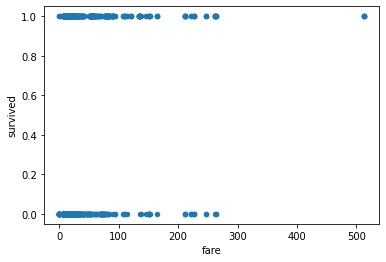

In [ ]:
merged_titanic.plot.scatter(x="fare", y='survived', figsize=(6,4))

From the scatter plot above, it can be seen that there are very large fare values (outliers) for passengers who survived.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


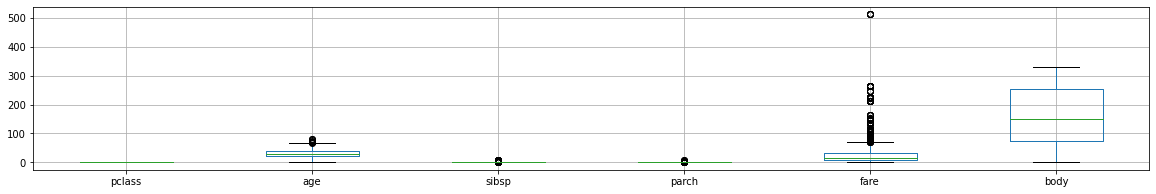

In [ ]:
data = merged_titanic.drop(['survived'],axis=1)
data.boxplot(figsize=(20,3))

Boxplots can also be used to show the presence of outliers. The main part of the boxplot is a box that presents the interquartile range (IQR). The lines that are an extension of the box are called whiskers. Values that are above or below the whisker are called outlier or extreme values.

(a) From the boxplot you see, which attribute contains the most outliers?

> It can be seen in the boxplot above that the attribute that contains the most outliers is Fare, looking at the points whose position is outside the box or IQR.

(b) Implement code to display the number of outliers in that attribute!

In [ ]:
merge_clean = merged_titanic.drop_duplicates()
fare = merge_clean["fare"]
q1 = fare.quantile(.25)
q3 = fare.quantile(.75)
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

outlier = merge_clean[(merge_clean['fare'] > upper) | (merge_clean['fare'] < lower)]
outlier['fare'].count()

171

There are 171 outliers.

Here I overcome this by removing the outliers from the existing dataframe. Another alternative is to replace the outlier values with the most appropriate central tendency.

In [ ]:
remove = merge_clean.drop(merge_clean[(merge_clean['fare'] > upper) | (merge_clean['fare'] < lower)].index)

outlier = remove[(remove['fare'] > upper) | (remove['fare'] < lower)]
outlier['fare'].count()

0

## Missing Values

Sometimes the data may be in the correct format, but some values are missing.

* Missing values occur when there are no data values stored for a variable (feature) in an observation.
* Usually missing values in the dataset appear as “?”, “N/A”, 0 or just empty cells.

To handle missing values, there is no single answer that always works for all scenarios, because of course the handling of missing values must be adjusted to the condition of the data or features that have missing values. However, there are several general options that can be considered, namely:

* Check again with the person/group collecting the data.
* If we don't know the missing values, a possible option is to delete/drop missing values.
     * Delete columns containing missing values, or
     * Deleted several rows of data that contained missing values.
* If there is relatively little data, a possible option is to replace missing values.
     * Replacing missing values with the overall mean value of the variable.
     * If the variable is non-numeric, replace the missing value with frequency/mode.
* If we assume the data will still be useful even if there are missing features, then we can allow missing values.

In [ ]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(merged_titanic)

           Total   Percent
body        1233  0.907285
cabin       1024  0.753495
boat         839  0.617366
home.dest    571  0.420162
age          267  0.196468
embarked       2  0.001472
fare           1  0.000736


There are several attributes that have a lot of null values, the body attribute has the most null values, up to 90%, "cabin" up to 77%.

In [ ]:
# View the contents of the cabin (first 20 rows)
merged_titanic['cabin'].head(20)

0          B5
1     C22 C26
2     C22 C26
3     C22 C26
4     C22 C26
5         E12
6          D7
7         A36
8        C101
9         NaN
10    C62 C64
11    C62 C64
12        B35
13        NaN
14        A23
15        NaN
16    B58 B60
17    B58 B60
18        D15
19         C6
Name: cabin, dtype: object

In [ ]:
# See how many passengers survive in each cabin
 (merged_titanic
 .groupby([merged_titanic.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,13.0,13.0
B,21.0,54.0
C,42.0,67.0
D,15.0,37.0
E,11.0,34.0
F,8.0,13.0
G,2.0,3.0
T,2.0,NaN


In [ ]:
# See the average fare in each cabin, for groups that survived and did not survive
 (merged_titanic
 .groupby([merged_titanic.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,31.257692,45.578838
B,80.909914,145.013430
C,116.593655,105.865612
D,45.313047,57.320054
E,46.431436,57.904168
F,11.241150,22.287500
G,10.462500,16.700000
T,35.500000,NaN


In [ ]:
# Drop attributes that are considered unimportant
titanic_cleaned = merged_titanic.drop(['name', 'ticket', 'body', 'cabin','home.dest'], axis=1)
titanic_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


These attributes are considered unimportant based on human judgment, reasoning, or basic knowledge. For example, if we want to measure the survival rate of Titanic passengers, the name attribute in this dataset does not indicate whether they survived or not. Apart from that, there are also several attributes that may not affect the measurement. So these attributes can be dropped.

Attributes need to be dropped if:

* Attributes are not intuitive.
* Attributes have many missing values.
* Attributes are not informative.
* Attributes may be harmful for certain models.
* These attributes can be generated from other attributes.

In [ ]:
cek_null(titanic_cleaned)

          Total   Percent
boat        839  0.617366
age         267  0.196468
embarked      2  0.001472
fare          1  0.000736


After removing unimportant attributes, it is necessary to handle attributes that still contain null values.

In [ ]:
# For the boat attribute, null values will be filled with "None"
titanic_cleaned['boat'] = titanic_cleaned['boat'].fillna('None')

In [ ]:
# Check the number of survivors and not if they have a boat or not
 (titanic_cleaned
 .groupby([titanic_cleaned.boat,'survived'])
 .boat
 .count()
 .unstack())

survived,0,1
boat,,
1,NaN,5.0
10,NaN,30.0
11,NaN,26.0
12,1.0,18.0
13,NaN,39.0
13 15,NaN,2.0
13 15 B,NaN,1.0
14,1.0,32.0
15,NaN,37.0


In [ ]:
cek_null(titanic_cleaned)

          Total   Percent
age         267  0.196468
embarked      2  0.001472
fare          1  0.000736


In [ ]:
# For the "age" attribute, the null value will be filled with the median value
col = ["age"]
for c in col:
    median = titanic_cleaned[~titanic_cleaned.isna()].median()[0]
    titanic_cleaned[c] = titanic_cleaned[c].fillna(median)

In [ ]:
# For the "embarked" attribute, the null value will be filled with the value 'C'
titanic_cleaned["embarked"] = titanic_cleaned["embarked"].fillna('C')

In [ ]:
cek_null(titanic_cleaned)

      Total   Percent
fare      1  0.000736


In [ ]:
# Only the "fare" attribute has 1 row of null values
titanic_cleaned[titanic_cleaned['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
1225,3,0,male,60.5,0,0,NaN,S,None


In [ ]:
# Delete rows where the "fare" attribute is null
titanic_cleaned.dropna(inplace=True)

In [ ]:
titanic_cleaned.shape

(1358, 9)

In [ ]:
titanic_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,None
3,1,0,male,30.00,1,2,151.5500,S,None
4,1,0,female,25.00,1,2,151.5500,S,None


In [ ]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1358
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1358 non-null   int64  
 1   survived  1358 non-null   int64  
 2   sex       1358 non-null   object 
 3   age       1358 non-null   float64
 4   sibsp     1358 non-null   int64  
 5   parch     1358 non-null   int64  
 6   fare      1358 non-null   float64
 7   embarked  1358 non-null   object 
 8   boat      1358 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 106.1+ KB


In [ ]:
# Perform label encoding, to convert categorical data of string type to numeric values
col = titanic_cleaned.select_dtypes(include=["object"]).columns

for c in col:
    if len(titanic_cleaned[c].value_counts()) <= 28:
        le = LabelEncoder()
        le.fit(list(titanic_cleaned[c].values))
        titanic_cleaned[c] = le.transform(list(titanic_cleaned[c].values))

In [ ]:
titanic_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,0,29.00,0,0,211.3375,2,11
1,1,1,1,0.92,1,2,151.5500,2,2
2,1,0,0,2.00,1,2,151.5500,2,27
3,1,0,1,30.00,1,2,151.5500,2,27
4,1,0,0,25.00,1,2,151.5500,2,27


In [ ]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1358
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1358 non-null   int64  
 1   survived  1358 non-null   int64  
 2   sex       1358 non-null   int64  
 3   age       1358 non-null   float64
 4   sibsp     1358 non-null   int64  
 5   parch     1358 non-null   int64  
 6   fare      1358 non-null   float64
 7   embarked  1358 non-null   int64  
 8   boat      1358 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 106.1 KB


## Preparation for Machine Learning

Suppose we are given the task of predicting whether someone will survive the Titanic disaster or not. The target attribute is "survived", while the other attributes are *predictors* (features that will determine the prediction results).

Some processing that can be done before our data is entered into a *machine learning* algorithm includes (but is not limited to):
* Separating target attributes and *predictor* attributes
* Perform normalization if necessary
* Separating data into *training* and *testing* data (will be discussed in the next few labs)

In [ ]:
# Separating target attributes (Y) from predictor attributes (X)
X = titanic_cleaned.drop('survived', axis=1)
Y = titanic_cleaned['survived']

(a) Perform normalization on X. Implement it with code! Hint: [Data Preprocessing Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
result = scale.fit_transform(titanic_cleaned)
scaled_result = pd.DataFrame(result)
scaled_result

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.361142,0.000,0.000000,0.412503,1.0,0.407407
1,0.0,1.0,1.0,0.009395,0.125,0.222222,0.295806,1.0,0.074074
2,0.0,0.0,0.0,0.022924,0.125,0.222222,0.295806,1.0,1.000000
3,0.0,0.0,1.0,0.373669,0.125,0.222222,0.295806,1.0,1.000000
4,0.0,0.0,0.0,0.311036,0.125,0.222222,0.295806,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
1353,0.0,0.0,1.0,0.561568,0.000,0.000000,0.051822,1.0,1.000000
1354,0.0,0.0,1.0,0.035450,0.000,0.000000,0.060508,1.0,1.000000
1355,0.0,1.0,1.0,0.523988,0.000,0.000000,0.051310,1.0,0.518519
1356,0.0,1.0,0.0,0.661781,0.000,0.000000,0.053571,0.0,0.629630


Minmaxscaler is a form that is easy to use, therefore many people use minmaxscaler to carry out normalization. Minmaxscaler will scale the data from 0 to 1 inclusively. Guarantee all features have the same scale.

From the Titanic data and the answers above, the minimum and maximum values for each attribute vary. Therefore, normalization needs to be carried out because the Titanic classification has a diverse range of values.